In [1]:
# Importing the required libraires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data from the csv file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Green Taxi 2017/2017_Green_Taxi_Trip_Data.csv")

In [3]:
# Selecting the January and February months data
df = data.iloc[:2093524]
print(df)

         VendorID    lpep_pickup_datetime  ... payment_type trip_type
0               2  01/01/2017 12:01:15 AM  ...            2       1.0
1               2  01/01/2017 12:03:34 AM  ...            2       1.0
2               2  01/01/2017 12:04:02 AM  ...            1       1.0
3               2  01/01/2017 12:01:40 AM  ...            2       1.0
4               2  01/01/2017 12:00:51 AM  ...            2       1.0
...           ...                     ...  ...          ...       ...
2093519         1  02/28/2017 11:01:12 PM  ...            1       1.0
2093520         1  02/28/2017 11:01:02 PM  ...            2       1.0
2093521         1  02/28/2017 11:00:14 PM  ...            2       1.0
2093522         1  02/28/2017 11:00:07 PM  ...            2       1.0
2093523         1  02/28/2017 11:00:03 PM  ...            1       1.0

[2093524 rows x 19 columns]


In [4]:
df.shape

(2093524, 19)

In [5]:
df.columns  

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type'],
      dtype='object')

In [6]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type               int64
trip_type                float64
dtype: object

In [7]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,01/01/2017 12:01:15 AM,01/01/2017 12:11:05 AM,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
1,2,01/01/2017 12:03:34 AM,01/01/2017 12:09:00 AM,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0
2,2,01/01/2017 12:04:02 AM,01/01/2017 12:12:55 AM,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
3,2,01/01/2017 12:01:40 AM,01/01/2017 12:14:23 AM,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
4,2,01/01/2017 12:00:51 AM,01/01/2017 12:18:55 AM,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0


In [8]:
df.nunique()

VendorID                       2
lpep_pickup_datetime     1634921
lpep_dropoff_datetime    1632341
store_and_fwd_flag             2
RatecodeID                     7
PULocationID                 257
DOLocationID                 259
passenger_count               10
trip_distance               3199
fare_amount                  981
extra                         10
mta_tax                        5
tip_amount                  1950
tolls_amount                 141
ehail_fee                      0
improvement_surcharge          3
total_amount                6492
payment_type                   5
trip_type                      2
dtype: int64

In [9]:
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                2093524
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      0
dtype: int64

In [10]:
# type of 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' are object and we need to convert the type to datetime.
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])

In [11]:
print(df['lpep_pickup_datetime'].dtypes)
print(df['lpep_dropoff_datetime'].dtypes)

datetime64[ns]
datetime64[ns]


Getting the Day name, date, hour, month from the date columns

In [12]:
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['lpep_dropoff_datetime'].dt.day_name()

In [13]:
df['pickup_day_no'] = df['lpep_pickup_datetime'].dt.weekday
df['dropoff_day_no'] = df['lpep_dropoff_datetime'].dt.weekday

In [14]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [15]:
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month
df['dropoff_month'] = df['lpep_dropoff_datetime'].dt.month

In [16]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,2,2017-01-01 00:01:15,2017-01-01 00:11:05,N,1,42,166,1,1.71,9.0,0.0,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0,Sunday,Sunday,6,6,0,0,1,1
1,2,2017-01-01 00:03:34,2017-01-01 00:09:00,N,1,75,74,1,1.44,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1.0,Sunday,Sunday,6,6,0,0,1,1
2,2,2017-01-01 00:04:02,2017-01-01 00:12:55,N,1,82,70,5,3.45,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0,Sunday,Sunday,6,6,0,0,1,1
3,2,2017-01-01 00:01:40,2017-01-01 00:14:23,N,1,255,232,1,2.11,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0,Sunday,Sunday,6,6,0,0,1,1
4,2,2017-01-01 00:00:51,2017-01-01 00:18:55,N,1,166,239,1,2.76,11.5,0.5,0.5,0.00,0.0,NaN,0.3,12.80,2,1.0,Sunday,Sunday,6,6,0,0,1,1


In [17]:
df['trip_duration'] = ((df.lpep_dropoff_datetime-df.lpep_pickup_datetime).apply(lambda x:x.total_seconds()/60.))
df['speed_mph'] = df.trip_distance/(df.trip_duration/60)

In [18]:
df.nunique()

VendorID                       2
lpep_pickup_datetime     1634921
lpep_dropoff_datetime    1632341
store_and_fwd_flag             2
RatecodeID                     7
PULocationID                 257
DOLocationID                 259
passenger_count               10
trip_distance               3199
fare_amount                  981
extra                         10
mta_tax                        5
tip_amount                  1950
tolls_amount                 141
ehail_fee                      0
improvement_surcharge          3
total_amount                6492
payment_type                   5
trip_type                      2
pickup_day                     7
dropoff_day                    7
pickup_day_no                  7
dropoff_day_no                 7
pickup_hour                   24
dropoff_hour                  24
pickup_month                   2
dropoff_month                  3
trip_duration              13141
speed_mph                 426026
dtype: int64

In [19]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

VendorID : 
[2 1]
2    1669615
1     423909
Name: VendorID, dtype: int64
************************************************
lpep_pickup_datetime : 
['2017-01-01T00:01:15.000000000' '2017-01-01T00:03:34.000000000'
 '2017-01-01T00:04:02.000000000' ... '2017-02-28T23:00:14.000000000'
 '2017-02-28T23:00:07.000000000' '2017-02-28T23:00:03.000000000']
2017-01-20 11:08:51    13
2017-01-31 11:26:50    11
2017-01-30 10:35:43    11
2017-01-23 12:29:20    10
2017-02-14 12:03:21    10
                       ..
2017-02-22 06:09:19     1
2017-02-28 16:40:42     1
2017-02-16 10:15:21     1
2017-01-20 09:34:46     1
2017-02-17 09:09:46     1
Name: lpep_pickup_datetime, Length: 1634921, dtype: int64
************************************************
lpep_dropoff_datetime : 
['2017-01-01T00:11:05.000000000' '2017-01-01T00:09:00.000000000'
 '2017-01-01T00:12:55.000000000' ... '2017-02-28T23:03:31.000000000'
 '2017-02-28T23:10:08.000000000' '2017-02-28T23:29:16.000000000']
2017-02-05 00:00:00    75
2017-01-22

df Cleaning

ehail_fee is having higher number of null values, needs to be dropped.
<!-- 
store_and_fwd_flag is having 99% of value as "N" needs to be dropped. -->



In [20]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'trip_duration',
       'speed_mph'],
      dtype='object')

"payment_type","total_amount","trip_duration","speed_mph","location_distance","mta_tax","extra","pickup_hour"

In [21]:
# Dropping the 'ehail_fee' as it is having all the values as null or having values that are having it's derived form
df = df.drop(["VendorID"],axis =1)
df = df.drop(["lpep_pickup_datetime"],axis =1)
df = df.drop(["lpep_dropoff_datetime"],axis =1)
df = df.drop(["PULocationID"],axis =1)
df = df.drop(["DOLocationID"],axis =1)
df = df.drop(["store_and_fwd_flag"],axis =1)
df = df.drop(["RatecodeID"],axis =1)
df = df.drop(["passenger_count"],axis =1)
df = df.drop(["fare_amount"],axis =1)
df = df.drop(["extra"],axis =1)
df = df.drop(["tolls_amount"],axis =1)
df = df.drop(["ehail_fee"],axis =1)
df = df.drop(["improvement_surcharge"],axis =1)
df = df.drop(["trip_type"],axis =1)
df = df.drop(["pickup_day"],axis =1)
df = df.drop(["dropoff_day"],axis =1)
df = df.drop(["pickup_day_no"],axis =1)
df = df.drop(["dropoff_day_no"],axis =1)
df = df.drop(["dropoff_hour"],axis =1)
df = df.drop(["dropoff_month"],axis =1)

In [22]:
df.columns

Index(['trip_distance', 'mta_tax', 'tip_amount', 'total_amount',
       'payment_type', 'pickup_hour', 'pickup_month', 'trip_duration',
       'speed_mph'],
      dtype='object')

In [23]:
df["total_amount"].median()

10.8

In [24]:
df = df[['mta_tax', 'total_amount', 'payment_type', 'pickup_hour','trip_duration', 'speed_mph', 'trip_distance', 'pickup_month', 'tip_amount']]

In [25]:
indices_oi = df[(df.total_amount<2.5)].index
df.loc[indices_oi,'total_amount'] = 10.8

In [26]:
df.head()

,mta_tax,total_amount,payment_type,pickup_hour,trip_duration,speed_mph,trip_distance,pickup_month,tip_amount
0,0.5,9.80,2,0,9.833333,10.433898,1.71,1,0.00
1,0.5,7.80,2,0,5.433333,15.901840,1.44,1,0.00
2,0.5,15.96,1,0,8.883333,23.302064,3.45,1,2.66
3,0.5,11.80,2,0,12.716667,9.955439,2.11,1,0.00
4,0.5,12.80,2,0,18.066667,9.166052,2.76,1,0.00


In [27]:
df.shape

(2093524, 9)

In [28]:
# Converting all the objects type columns to integer, to make the algorithm learn about the values
le = LabelEncoder()

In [29]:
objList = df.select_dtypes(include = "object").columns
print (objList)
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093524 entries, 0 to 2093523
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mta_tax        float64
 1   total_amount   float64
 2   payment_type   int64  
 3   pickup_hour    int64  
 4   trip_duration  float64
 5   speed_mph      float64
 6   trip_distance  float64
 7   pickup_month   int64  
 8   tip_amount     float64
dtypes: float64(6), int64(3)
memory usage: 143.8 MB
None


Few of the questions those arises are:

  What are the specific days people may be willing to tip more.
  
  If the tip is getting delivered in less time, is it increasing the chance of getting tips at a higher rate

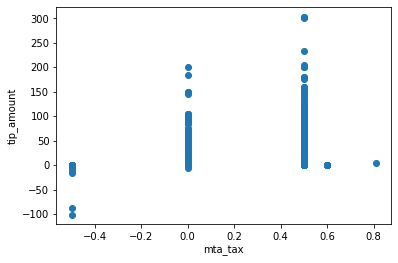

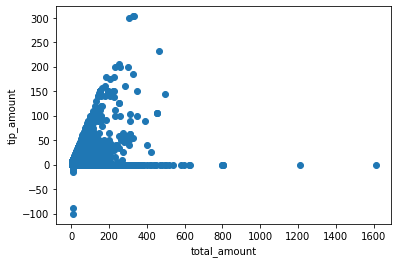

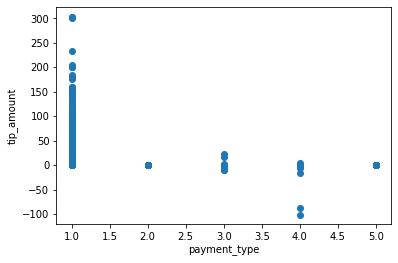

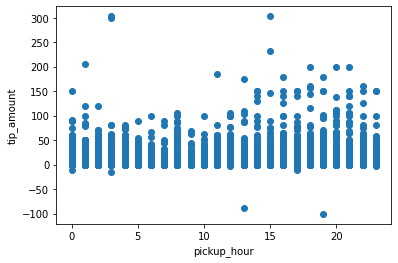

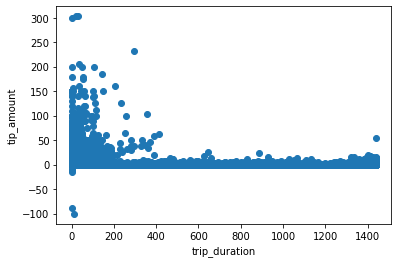

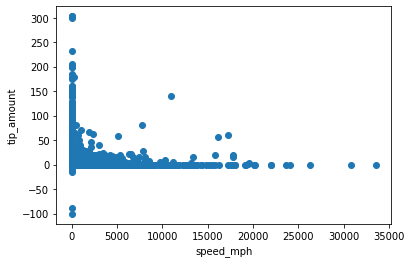

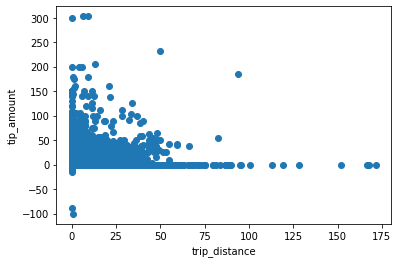

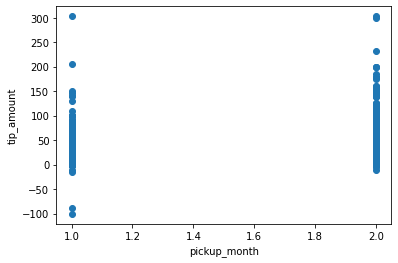

In [30]:
## Here we will compare the difference between All feature with Rented Bike Count

for feature in df.columns:
    if feature!='tip_amount':
        data=df.copy()
        plt.scatter(data[feature],data['tip_amount'])
        plt.xlabel(feature)
        plt.ylabel('tip_amount')
        plt.show()

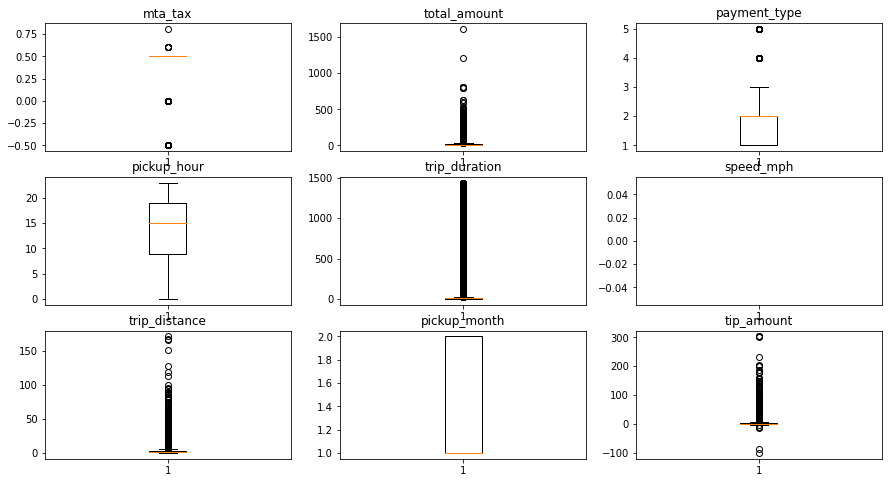

In [31]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(9,3,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1

plt.show()

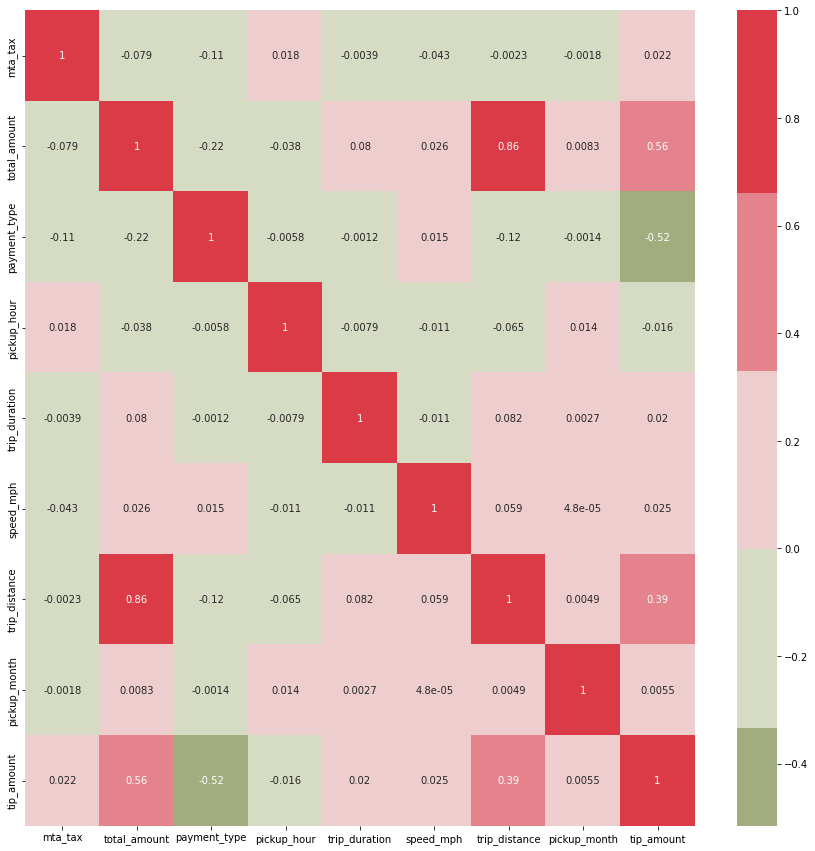

In [32]:
correlation = df.corr()
plt.figure(figsize = (15,15))
cmap= sns.diverging_palette(100, 10)
sns.heatmap(correlation, annot = True, cmap =cmap, center = 0)

In [33]:
df.head()

,mta_tax,total_amount,payment_type,pickup_hour,trip_duration,speed_mph,trip_distance,pickup_month,tip_amount
0,0.5,9.80,2,0,9.833333,10.433898,1.71,1,0.00
1,0.5,7.80,2,0,5.433333,15.901840,1.44,1,0.00
2,0.5,15.96,1,0,8.883333,23.302064,3.45,1,2.66
3,0.5,11.80,2,0,12.716667,9.955439,2.11,1,0.00
4,0.5,12.80,2,0,18.066667,9.166052,2.76,1,0.00


Using Januray Data for Training purpose and February data for Testing purpose

In [34]:
train = df[df['pickup_month'] == 1]
test = df[df['pickup_month'] == 2]

In [35]:
train = train.drop(["pickup_month"],axis =1)
test = test.drop(["pickup_month"],axis =1)

In [36]:
train = train.reset_index()
test = test.reset_index()

In [37]:
train.dropna(inplace = True)
test.dropna(inplace = True)

In [38]:
train.isnull().sum()

index            0
mta_tax          0
total_amount     0
payment_type     0
pickup_hour      0
trip_duration    0
speed_mph        0
trip_distance    0
tip_amount       0
dtype: int64

In [39]:
test.isnull().sum()

index            0
mta_tax          0
total_amount     0
payment_type     0
pickup_hour      0
trip_duration    0
speed_mph        0
trip_distance    0
tip_amount       0
dtype: int64

In [40]:
train.head()

,index,mta_tax,total_amount,payment_type,pickup_hour,trip_duration,speed_mph,trip_distance,tip_amount
0,0,0.5,9.80,2,0,9.833333,10.433898,1.71,0.00
1,1,0.5,7.80,2,0,5.433333,15.901840,1.44,0.00
2,2,0.5,15.96,1,0,8.883333,23.302064,3.45,2.66
3,3,0.5,11.80,2,0,12.716667,9.955439,2.11,0.00
4,4,0.5,12.80,2,0,18.066667,9.166052,2.76,0.00


In [41]:
test.head()

,index,mta_tax,total_amount,payment_type,pickup_hour,trip_duration,speed_mph,trip_distance,tip_amount
0,1070261,0.5,19.24,1,0,6.900000,39.478261,4.54,4.44
1,1070262,0.5,14.80,2,0,14.666667,13.131818,3.21,0.00
2,1070263,0.5,10.30,1,0,8.600000,11.372093,1.63,1.00
3,1070264,0.5,6.80,2,0,5.116667,8.912052,0.76,0.00
4,1070265,0.5,10.80,1,0,6.466667,20.783505,2.24,1.00


In [42]:
X_train = train.iloc[:, :6]
y_train = train["tip_amount"]

X_test = test.iloc[:, :6]
y_test = test["tip_amount"]

Reason for using Random Forest Regressor#

Large data set,
Less chance of High Variance, can counter Variance that arises in Decision Tree.

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [44]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.7315431803962411


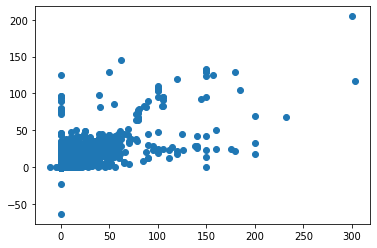

In [56]:
plt.scatter(y_test,y_pred)

To Perform Cross validation technique we can use below code and can get better R2 Score.

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [49]:
# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
# Use the Random grid to search for best hyperparameters
# First Create the base model to tune
rf = RandomForestRegressor()

In [53]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 3, random_state=42)

In [57]:
model.fit(X_train, y_train)

In [ ]:
model.best_params_

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
print("R2 Score: ", r2_score(y_test, y_pred))